# Imports

In [245]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# imoport minmax scaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [246]:
df = pd.read_csv('Human_Resuorces_Analytics.csv')

df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


# Section A: Data Exploration and Pre-processing

## EDA

In [247]:
# Count by race
race_counts = df['RaceDesc'].value_counts()

# Count by gender
gender_counts = df['Sex'].value_counts()

# Count by citizenship
citizenship_counts = df['CitizenDesc'].value_counts()

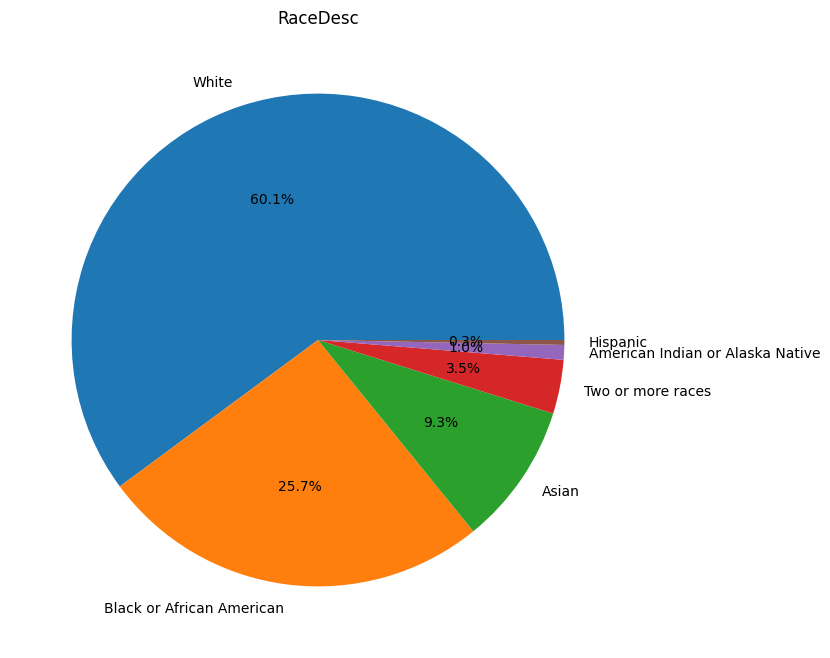

In [248]:
# pie plot for the RaceDesc
plt.figure(figsize=(20, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
plt.title('RaceDesc')
plt.show()

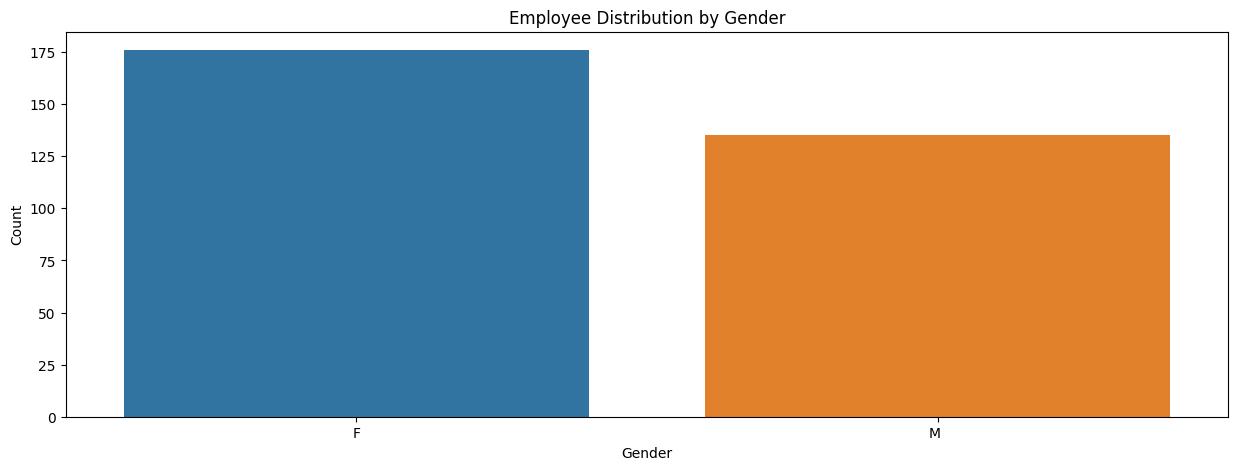

In [249]:
fig, ax = plt.subplots(figsize=(15, 5))

# Gender counts
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax)
ax.set_title('Employee Distribution by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show()

<Axes: xlabel='RaceDesc', ylabel='count'>

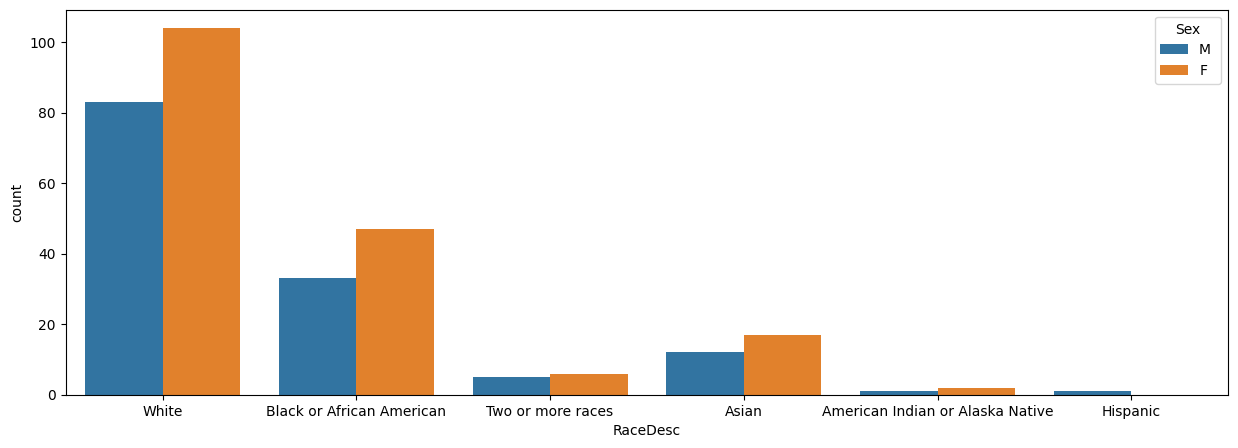

In [250]:
# countplot for the sex and race
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df, x ='RaceDesc', hue='Sex', ax=ax)

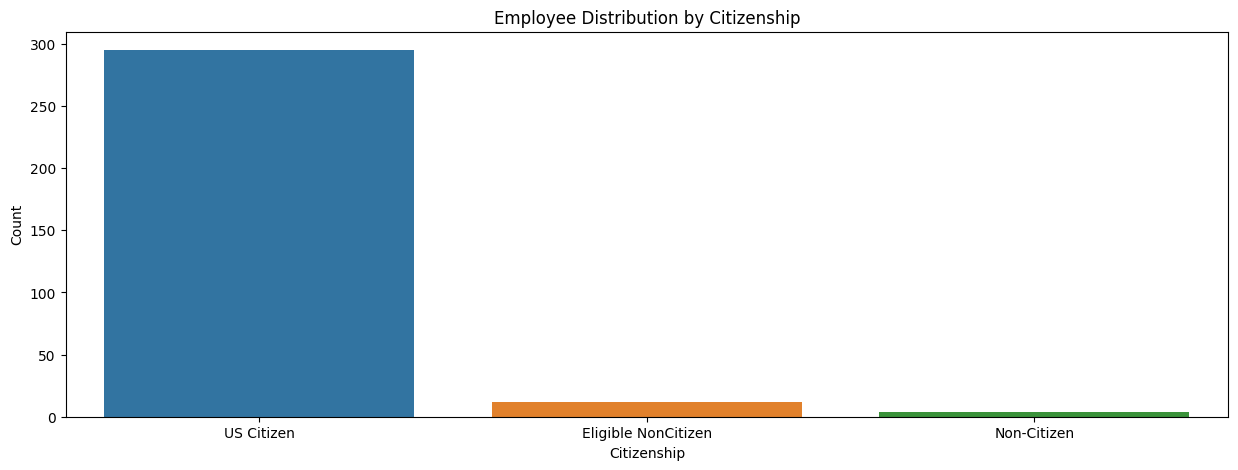

In [251]:
fig, ax = plt.subplots(figsize=(15, 5))

# Citizenship counts
sns.barplot(x=citizenship_counts.index, y=citizenship_counts.values, ax=ax)
ax.set_title('Employee Distribution by Citizenship')
ax.set_xlabel('Citizenship')
ax.set_ylabel('Count')
plt.show()


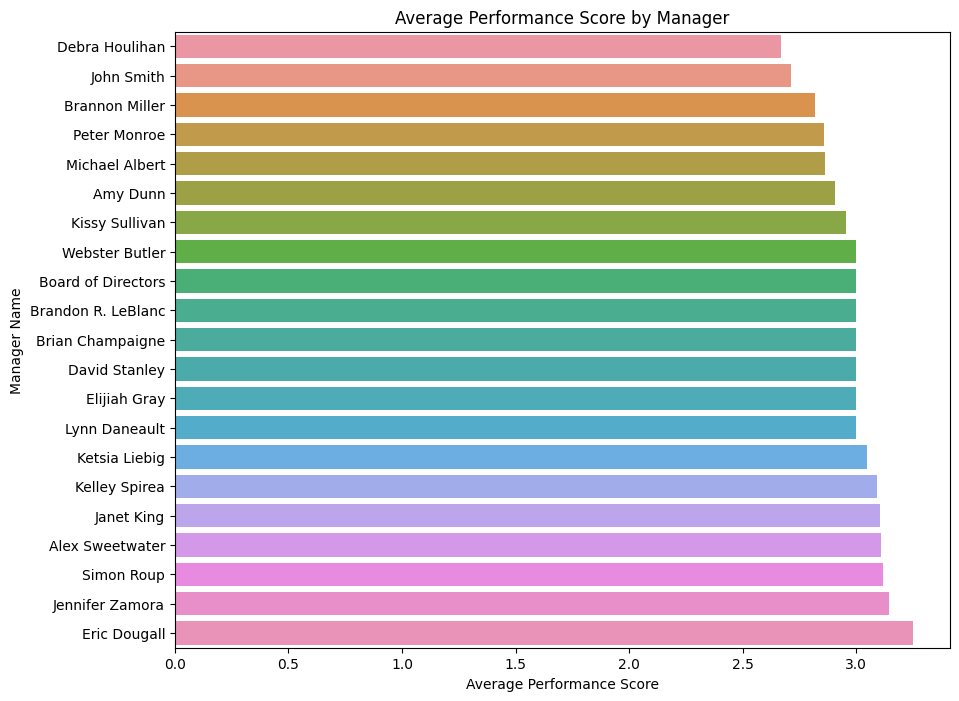

In [252]:
# Group by Manager and calculate mean performance score
manager_performance = df.groupby('ManagerName')['PerfScoreID'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=manager_performance.values, y=manager_performance.index, orient='h')
plt.title('Average Performance Score by Manager')
plt.xlabel('Average Performance Score')
plt.ylabel('Manager Name')
plt.show()

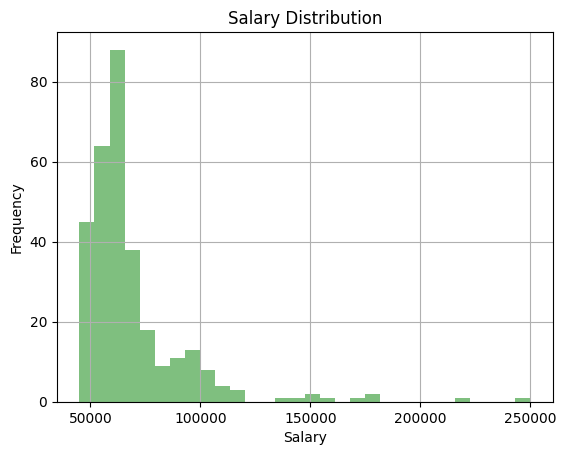

In [253]:
# Create a histogram for the 'Salary' column
plt.hist(df['Salary'], bins=30, alpha=0.5, color='g')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

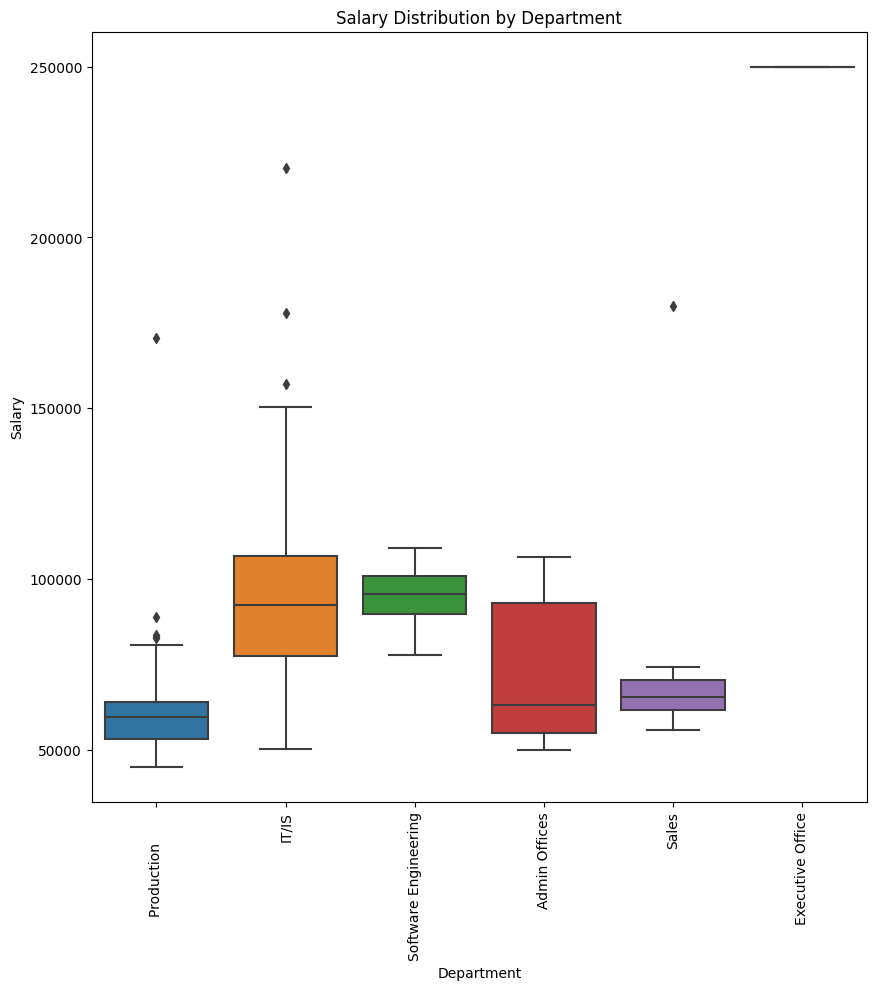

In [254]:
# Create a box plot for the 'Salary' column categorized by 'Department'
plt.figure(figsize=(10, 10))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

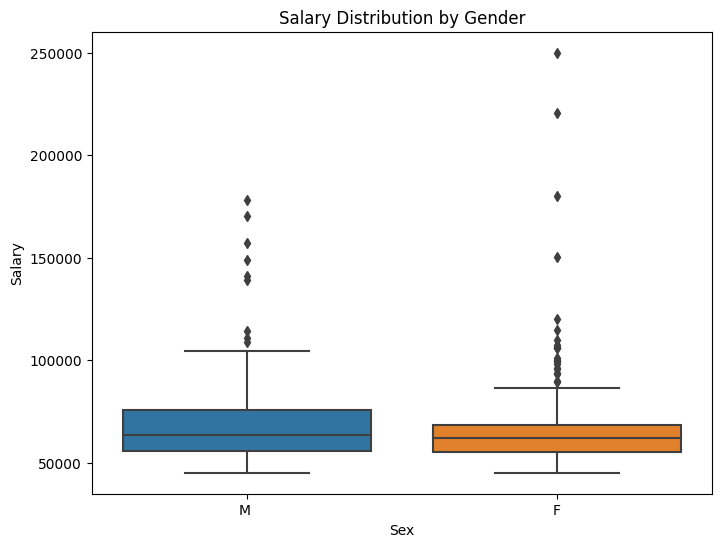

In [255]:
# Create a boxplot for the 'Salary' column categorized by 'GenderID'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

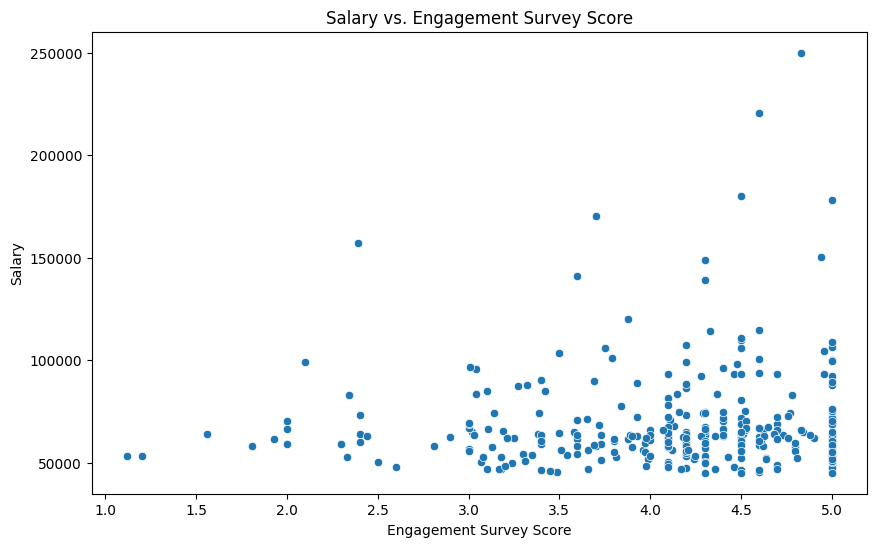

In [256]:
# Create a scatter plot for 'Salary' and 'EngagementSurvey' columns to see if there's any correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EngagementSurvey', y='Salary', data=df)
plt.title('Salary vs. Engagement Survey Score')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Salary')
plt.show()

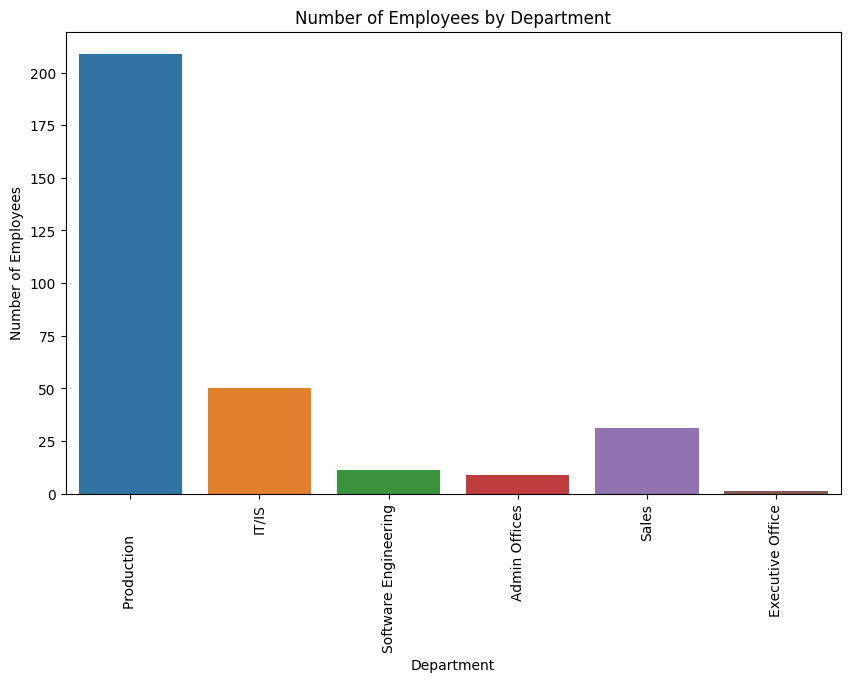

In [257]:
# Create a bar plot for the 'Department' column to see the number of employees in each department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()

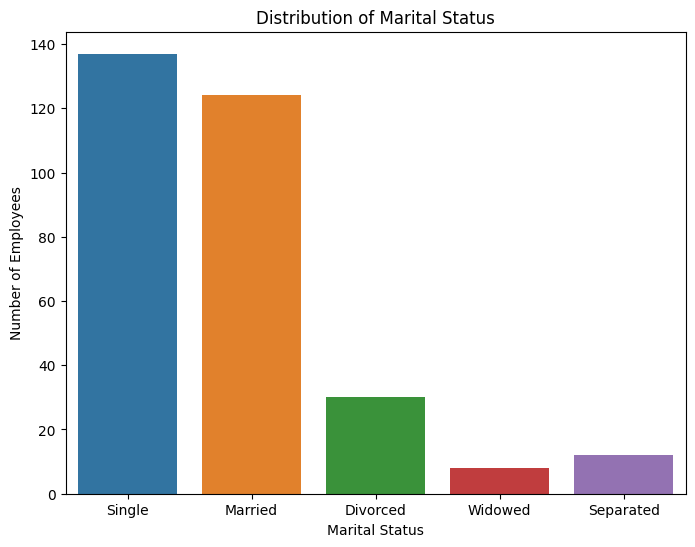

In [258]:
# Create a bar plot for the 'MaritalStatusID' column to see the distribution of marital status
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalDesc', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.show()

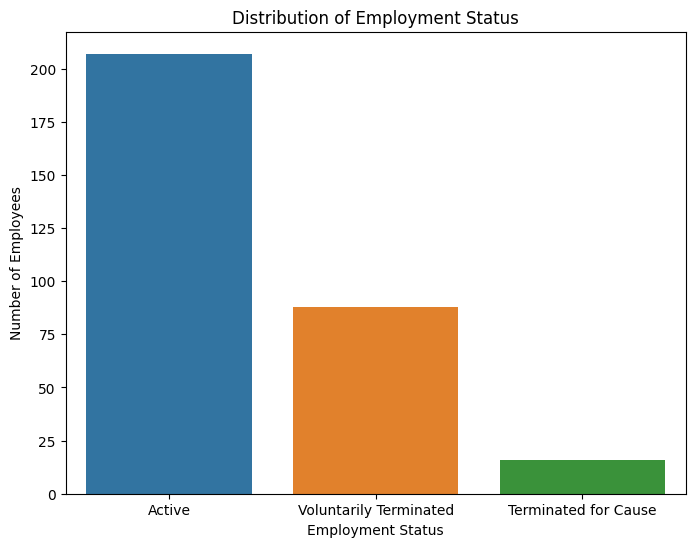

In [259]:
# Create a bar plot for the 'EmpStatusID' column to see the distribution of employment status
plt.figure(figsize=(8, 6))
sns.countplot(x='EmploymentStatus', data=df)
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Employees')
plt.show()

### I think we can delete it. down

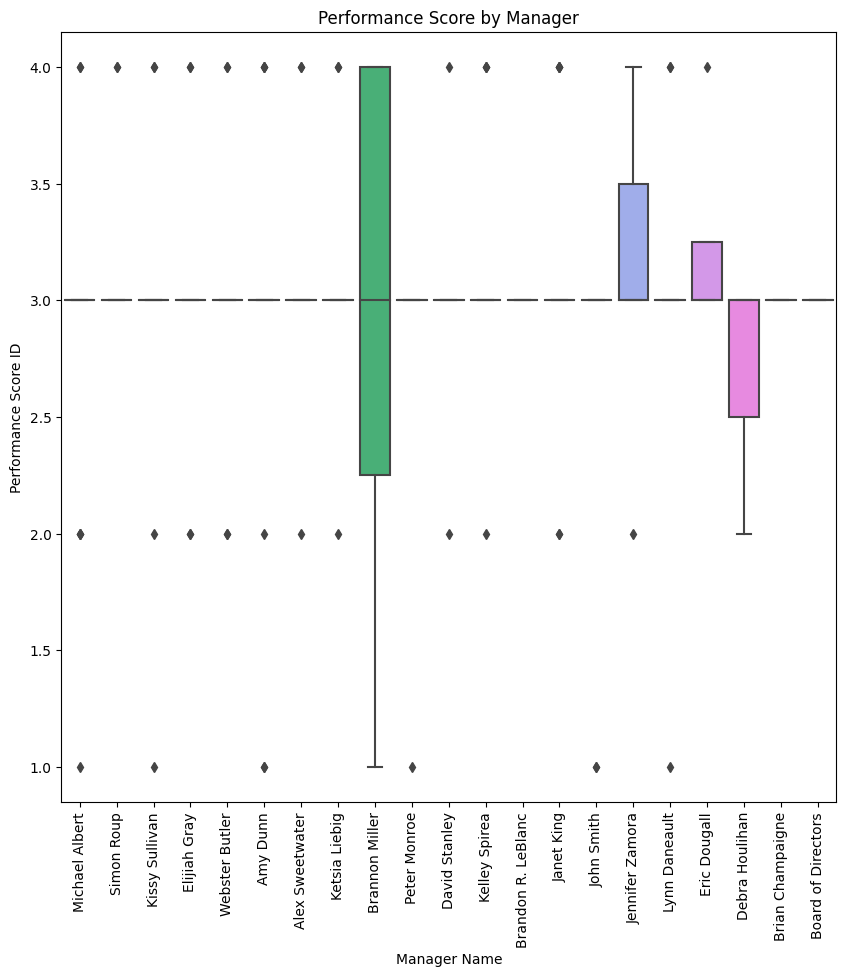

In [260]:
# Create a box plot for the 'PerfScoreID' column categorized by 'ManagerName'
plt.figure(figsize=(10, 10))
sns.boxplot(x='ManagerName', y='PerfScoreID', data=df)
plt.title('Performance Score by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Performance Score ID')
plt.xticks(rotation=90)
plt.show()

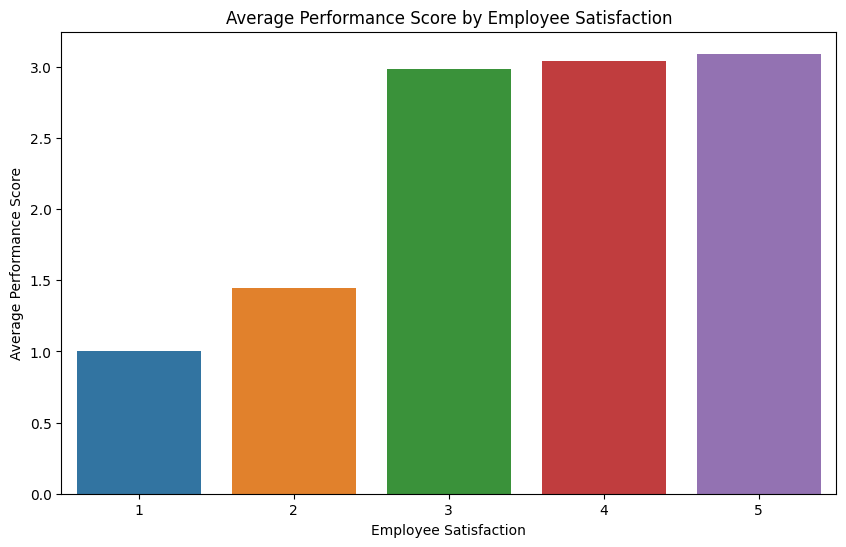

In [261]:
# Group by EmpSatisfaction and calculate mean performance score
satisfaction_performance = df.groupby('EmpSatisfaction')['PerfScoreID'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_performance.index, y=satisfaction_performance.values)
plt.title('Average Performance Score by Employee Satisfaction')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Average Performance Score')
plt.show()


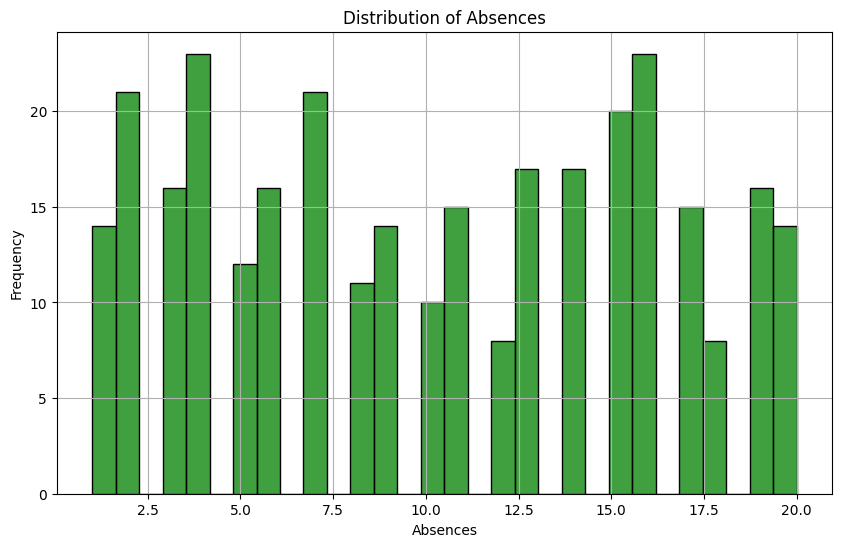

In [262]:
# Next, let's visualize the distribution of absences
plt.figure(figsize=(10, 6))
sns.histplot(df['Absences'], bins=30, color='g')
plt.title('Distribution of Absences')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

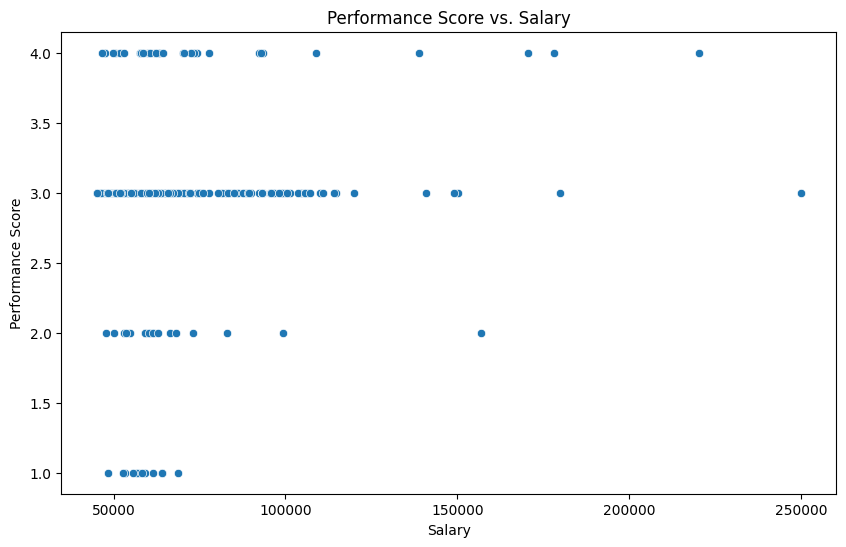

In [263]:
# Performance and salary distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PerfScoreID', data=df)
plt.title('Performance Score vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()


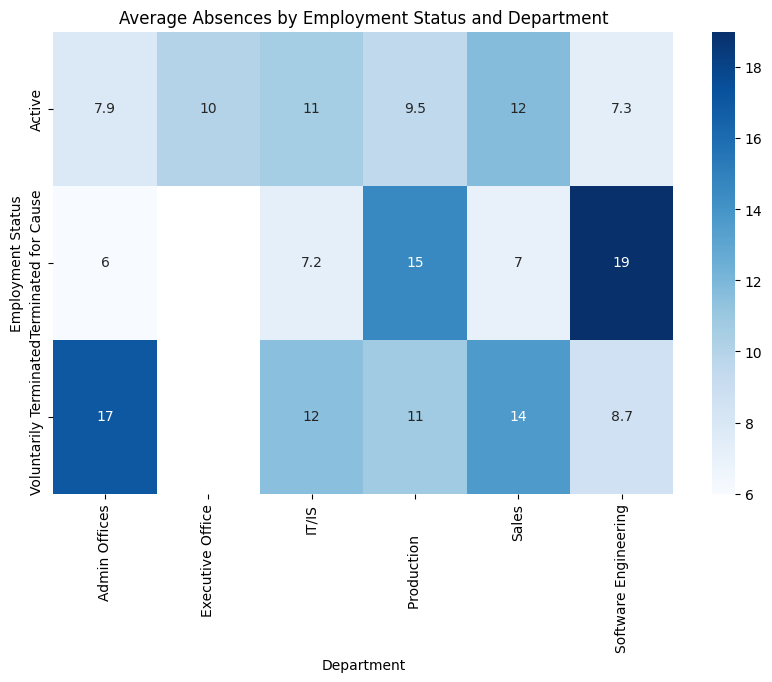

In [264]:
# Heatmap for employment status and department by absences
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby(['EmploymentStatus', 'Department'])['Absences'].mean().unstack(), annot=True, cmap='Blues')
plt.title('Average Absences by Employment Status and Department')
plt.xlabel('Department')
plt.ylabel('Employment Status')
plt.show()



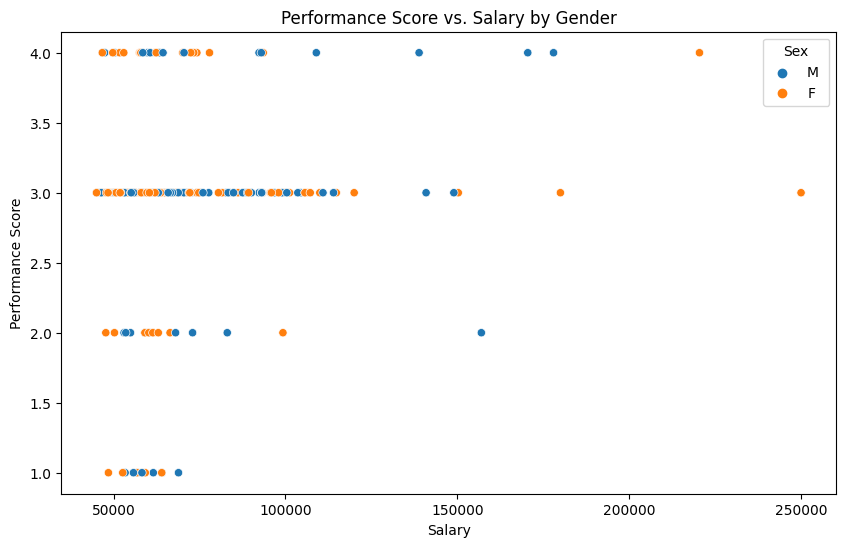

In [265]:
# Plot for Salary and gender and race
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PerfScoreID', hue='Sex', data=df)
plt.title('Performance Score vs. Salary by Gender')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()


## Data Pre-processing

In [266]:
df['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [267]:
df['EmpStatusID'].unique()

array([1, 5, 3, 4, 2])

In [268]:
# print the observations that has the EmpStatusID is 5 print the EmploymentStatus
print(df[df['EmpStatusID'] == 1]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 2]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 3]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 4]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 5]['EmploymentStatus'].unique())

['Active' 'Terminated for Cause']
['Active']
['Active']
['Terminated for Cause']
['Voluntarily Terminated']


After Exploration we decided to drop the EmpStatusID because the target value is EmploymentStatus

In [269]:
# label encoding for the EmploymentStatus all values
df['EmploymentStatus'] = df['EmploymentStatus'].map({'Active': 1, 'Voluntarily Terminated': 2, 'Terminated for Cause': 3})

In [270]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum())

DateofTermination 207
ManagerID 8


In [271]:
# calculate percentage of null values in each column
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum() / df.shape[0])

DateofTermination 0.6655948553054662
ManagerID 0.02572347266881029


In [272]:
# check the value of the observations that has date of termination null in the columns Termd
df[df['DateofTermination'].isnull()]['Termd'].unique()

array([0])

In [273]:
# Create a copy of the DataFrame for imputation
ToImputeDf = df.copy()
# Convert the "DateofTermination" column to datetime type
ToImputeDf['DateofTermination'] = pd.to_datetime(ToImputeDf['DateofTermination'])
# Use forward fill to fill missing values in dates
ToImputeDf['DateofTermination'] = ToImputeDf['DateofTermination'].ffill()
# Assign the imputed values back to the original DataFrame
df['DateofTermination'] = ToImputeDf['DateofTermination']

#drop ManagerId null values
df.dropna(subset=['ManagerID'], inplace=True)

In [274]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum())

DateofTermination 1


In [275]:
# drop null observations
df.dropna(inplace=True)

In [276]:
# Check the data types of the columns
df.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                            object
DateofTerm

In [277]:
df.shape  

(302, 36)

In [278]:
#check duplicates
df.duplicated().sum()

0

In [279]:
# scaler = MinMaxScaler()

# # Perform feature scaling on the 'Salary' column
# df['Salary'] = scaler.fit_transform(df[['Salary']])
# df['Zip'] = scaler.fit_transform(df[['Zip']])

# # Display the first few rows of the DataFrame to verify
# df.head()

In [280]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'TermReason',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')

In [281]:
# Check the data types of the date columns
date_columns = ['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
df[date_columns].dtypes

DOB                                   object
DateofHire                            object
DateofTermination             datetime64[ns]
LastPerformanceReview_Date            object
dtype: object

In [282]:
# Attempt to convert the date columns to datetime
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col])
    except Exception as e:
        print(f"Error in column {col}: {e}")

# Display the data types of the date columns after conversion
df[date_columns].dtypes

DOB                           datetime64[ns]
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
LastPerformanceReview_Date    datetime64[ns]
dtype: object

In [283]:
df_SectionE = df.copy()

In [284]:
# Drop EmpID and ManagerID columns
df.drop(columns=['EmpID', 'ManagerID'], inplace=True)

In [285]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Employee_Name', 'Position', 'State', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore'],
      dtype='object')

In [286]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Employee_Name', 'Position', 'State', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore'],
      dtype='object')

In [287]:
# Drop categorical columns
df.drop(columns=categorical_cols, inplace=True)

/var/folders/zd/sy35yntd57n5p03xpl9wxvnc0000gn/T/ipykernel_44460/349424307.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



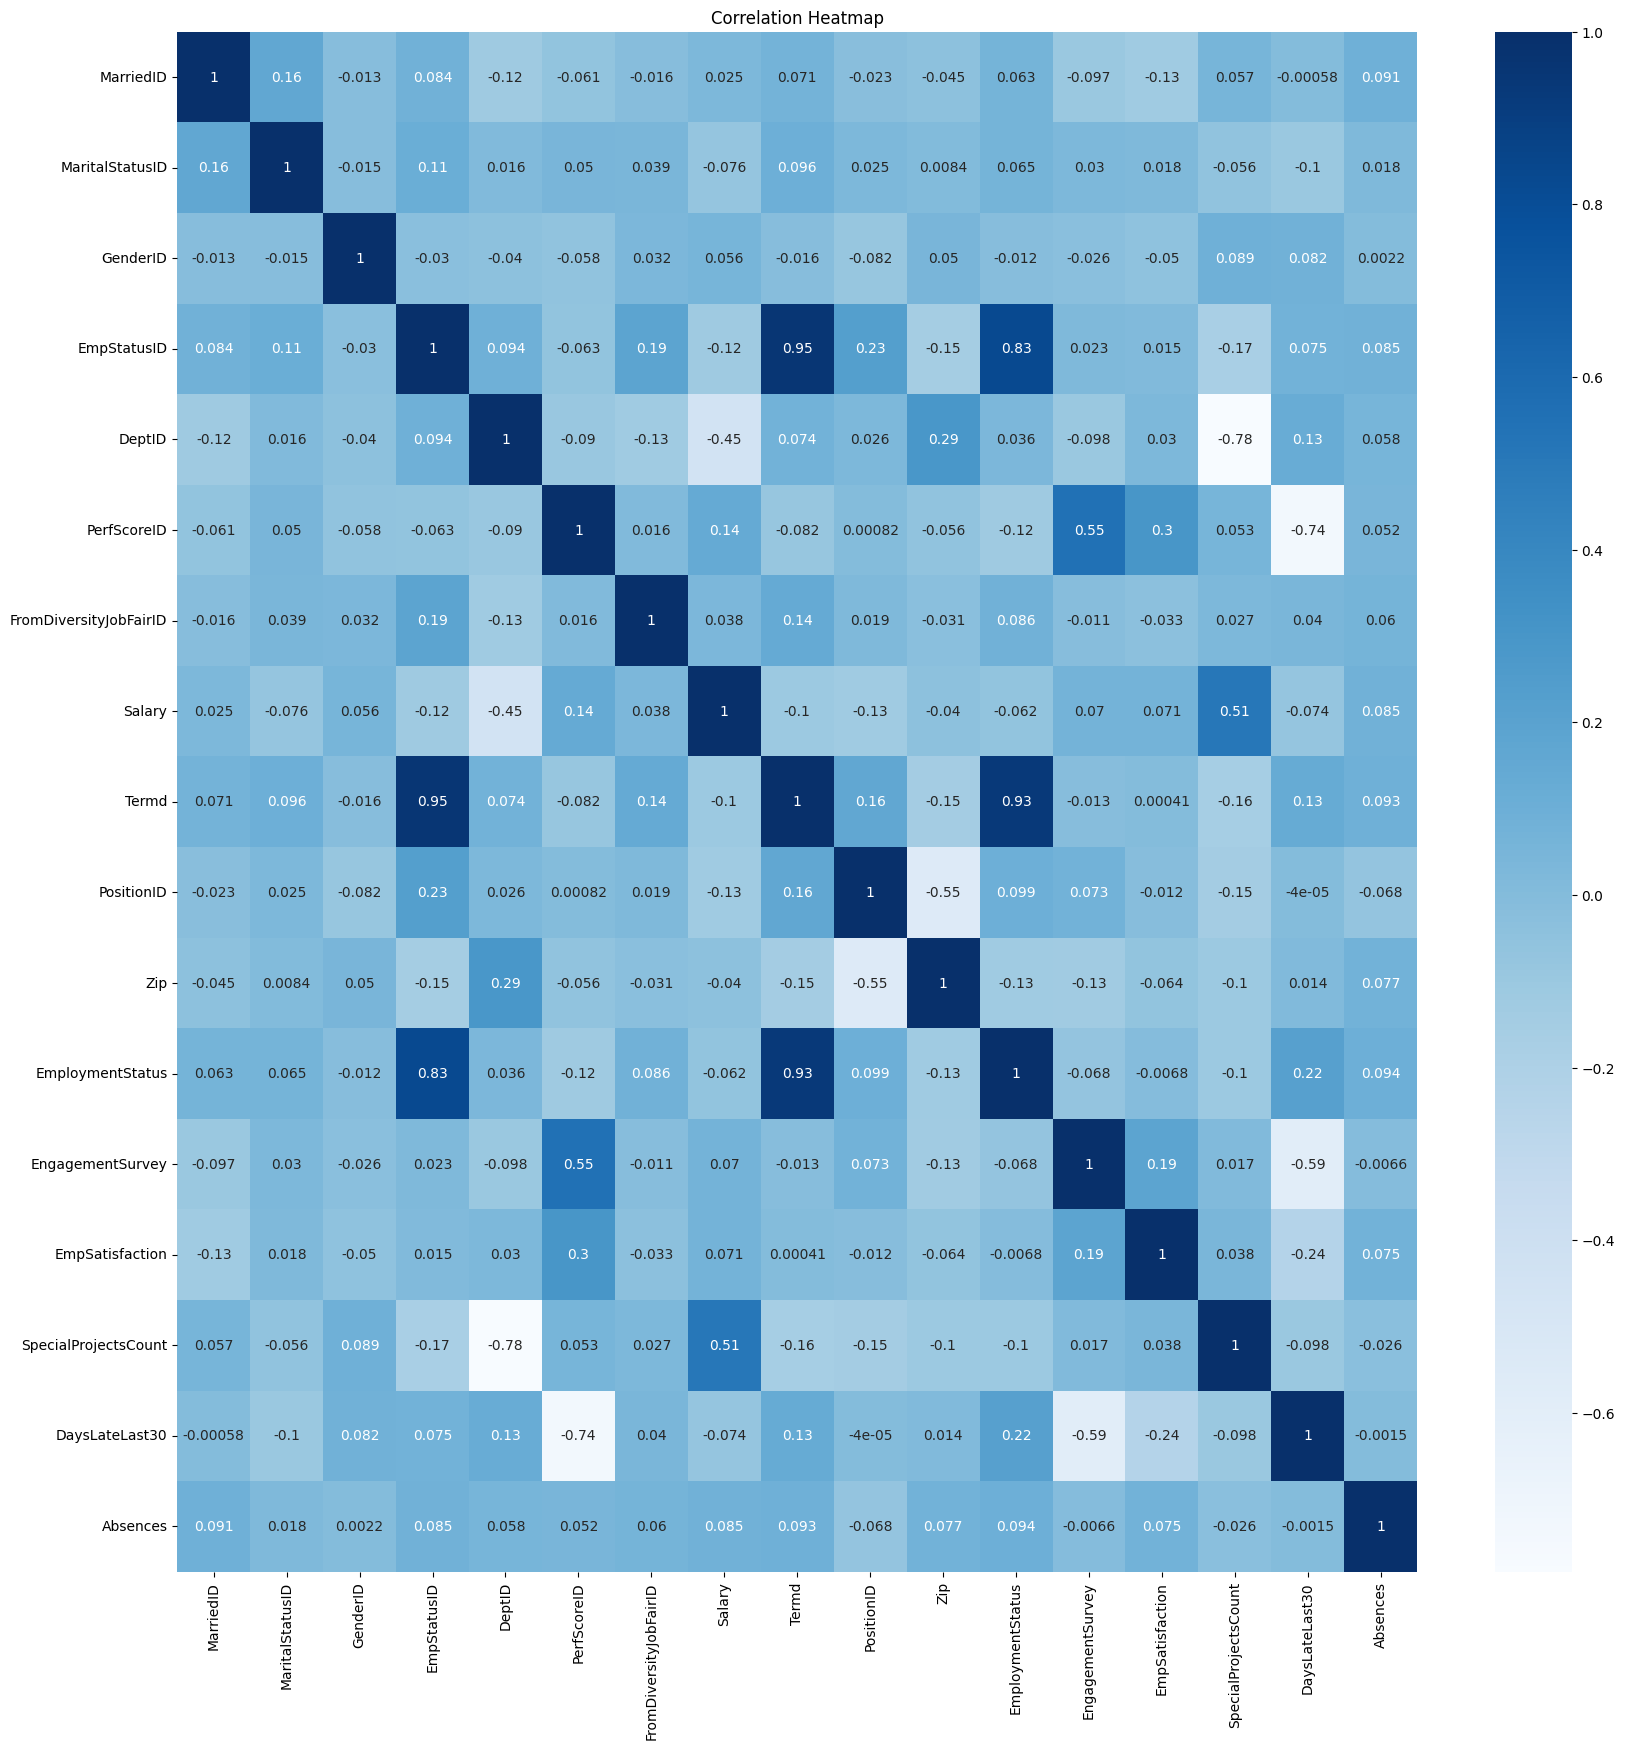

In [288]:
# correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [289]:
df.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'DOB', 'DateofHire', 'DateofTermination',
       'EmploymentStatus', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [290]:
# Drop highly correlated features   
df.drop(columns=['SpecialProjectsCount','EmpStatusID'], inplace=True)

In [291]:
# Drop ZIP column
df.drop(columns=['Zip'], inplace=True)

/var/folders/zd/sy35yntd57n5p03xpl9wxvnc0000gn/T/ipykernel_44460/1077605463.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



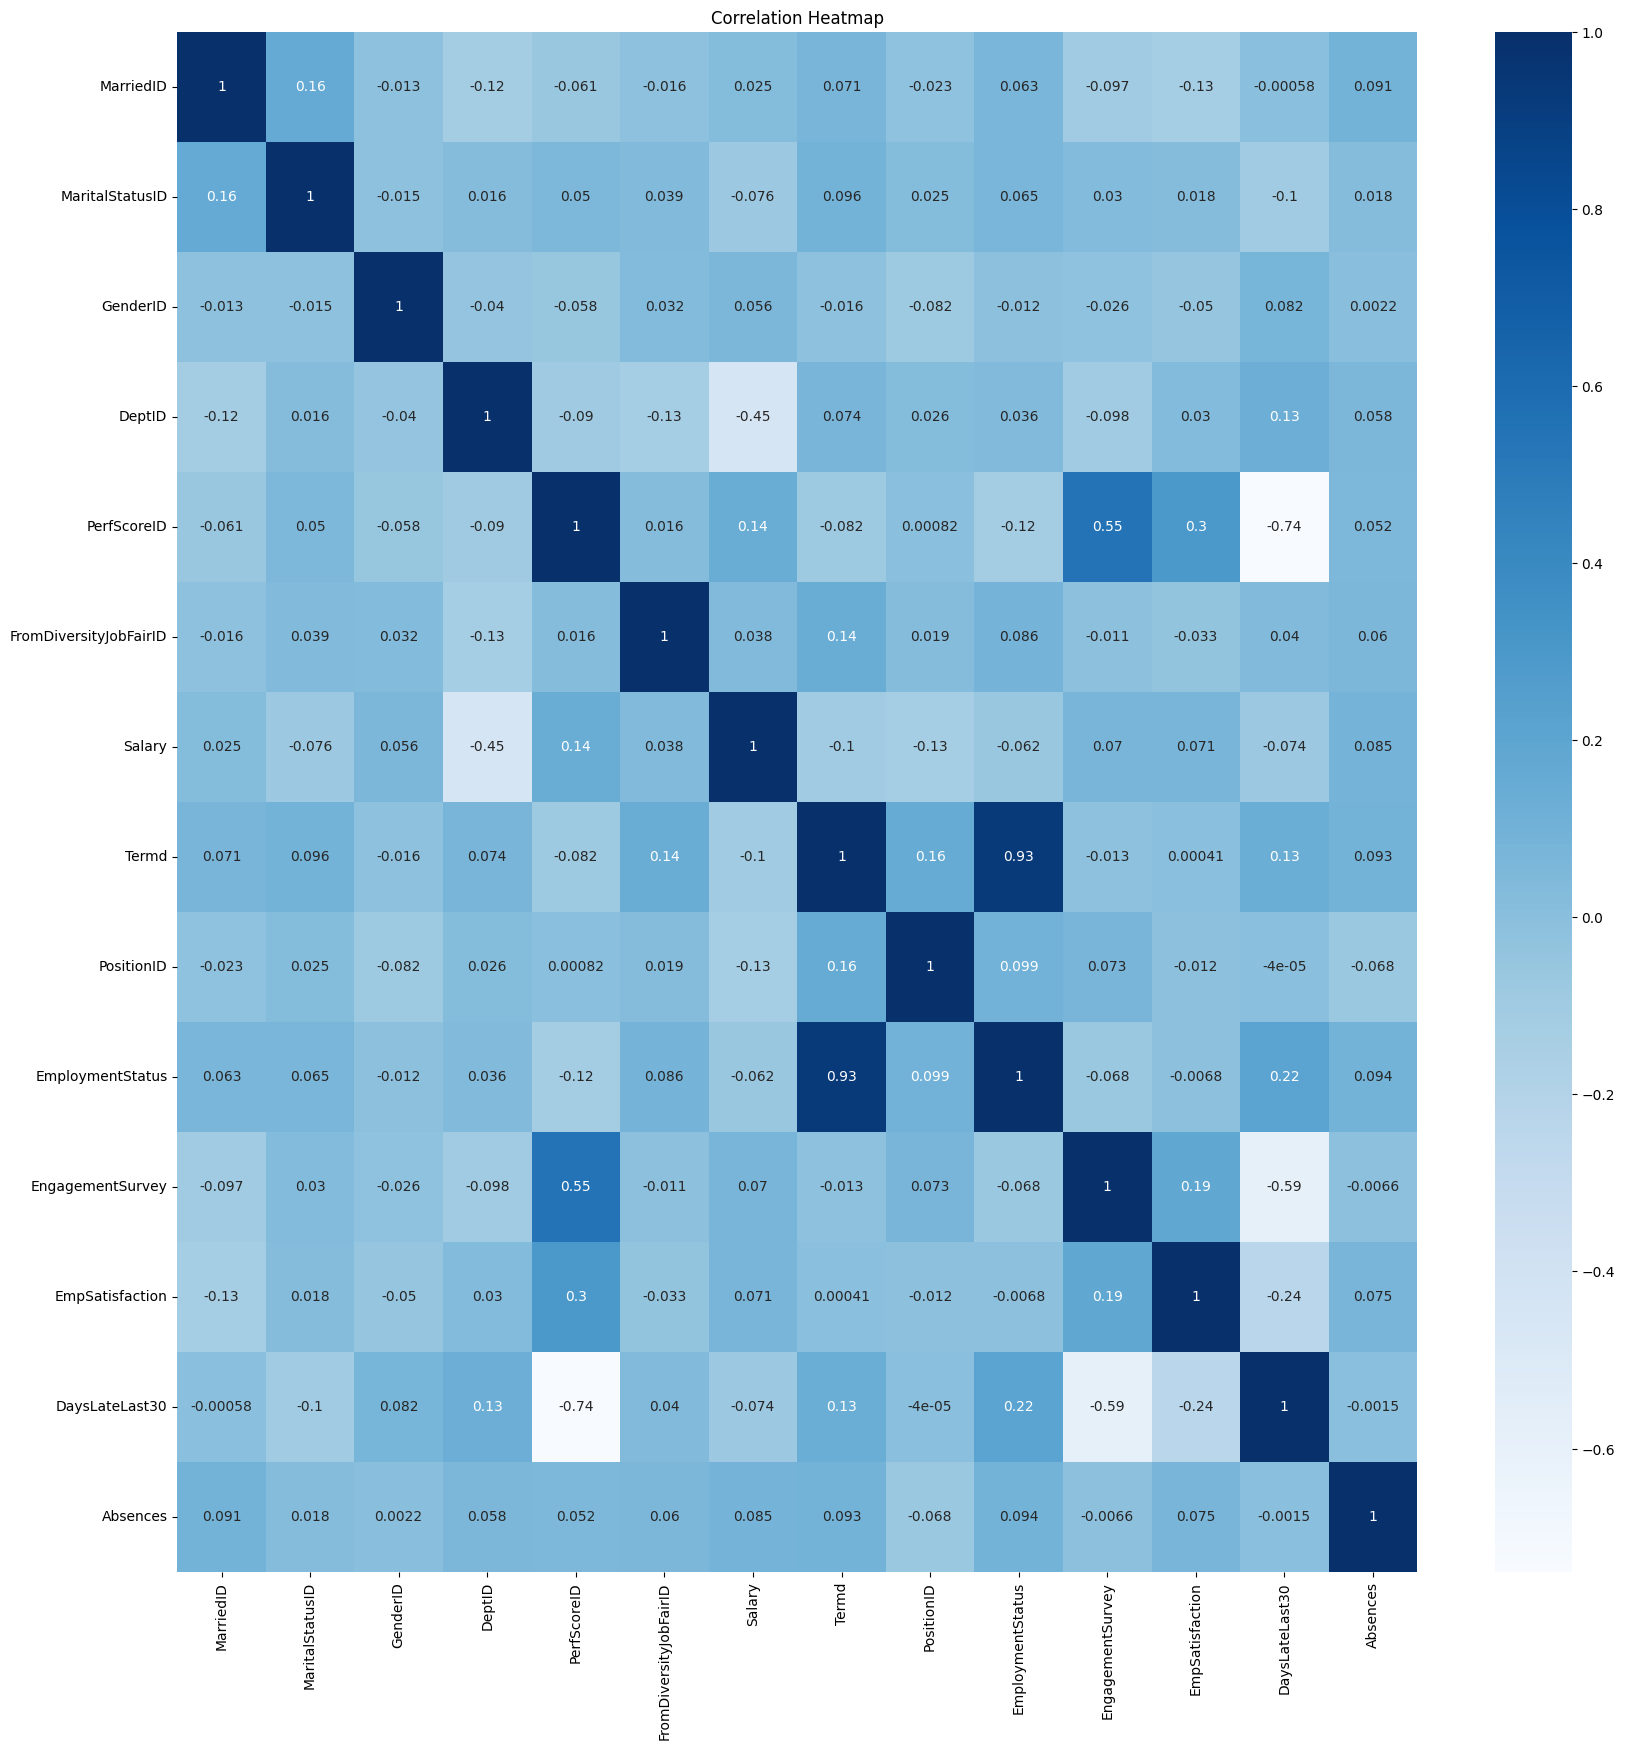

In [292]:
# correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

    Regression Data

In [293]:
reg_data = df[df['Termd'] == 1]

In [294]:
reg_data.shape

(104, 18)

In [295]:
reg_data.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'DOB',
       'DateofHire', 'DateofTermination', 'EmploymentStatus',
       'EngagementSurvey', 'EmpSatisfaction', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences'],
      dtype='object')

In [296]:
reg_data.dtypes

MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
DOB                           datetime64[ns]
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
EmploymentStatus                       int64
EngagementSurvey                     float64
EmpSatisfaction                        int64
LastPerformanceReview_Date    datetime64[ns]
DaysLateLast30                         int64
Absences                               int64
dtype: object

In [297]:
reg_data.isna().sum()

MarriedID                     0
MaritalStatusID               0
GenderID                      0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
DOB                           0
DateofHire                    0
DateofTermination             0
EmploymentStatus              0
EngagementSurvey              0
EmpSatisfaction               0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
dtype: int64

In [298]:
# Drop the date columns
df.drop(columns=['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date'], inplace=True)

## Section A - Data Exploration and Pre-processing

### Data Exploration

We started the data exploration by creating various visualizations to understand the data better. Here are the visualizations we created:

1. **Pie Plot of Race Description:** This plot helped us understand the overall diversity profile of the organization.
2. **Box Plot of Gender and another for CitezinShip:** Helped us to understand the diversity of the organization.
3. **Bar Plot of Performance Score by Manager:** This plot helped us understand the relationship between who a person works for and their performance score.
4. **Histogram of Salary:** This plot helped us understand the distribution of salaries among the employees.
5. **Box Plot of Salary by Department:** This plot helped us understand whether there are areas of the company where pay is not equitable.
6. **Box Plot of Slary by Gender:** This plot helped us understand whether there are areas of the company where pay is not equitable.
7. **Scatter Plot Salary and Engagement Survey Score:** This plot helped us understand the relationship between salary and engagement survey score.
8. **Box Plot for the PerfScoreID and ManagerName:** This plot helped us understand the relationship between who a person works for and their performance score.
9. **Bar Plot for Performance and Employee Satisfaction:** This plot helped us understand the relationship between employee satisfaction and performance score.
10. **Histogram of Absences:** This plot helped us understand the distribution of absences among the employees.
11. **Scatter Plot of Performance and Salary.** This plot helped us understand the relationship between salary and performance score.

### Data Pre-processing

After exploring the data, we moved on to pre-processing the data to prepare it for the machine learning models. Here are the pre-processing steps we performed:

1. **Checked for Missing Values:** We found that the dataset does not contain any missing values.
2. **Checked for Duplicate Rows:** We found that the dataset does not contain any duplicate rows.
3. **Performed Feature Scaling on the 'Salary' Column:** We used the StandardScaler to ensure that the 'Salary' column has the same scale as the other columns.
4. **Date Pre-processing Summary:** After pre-processing the data, we ended up with a dataset that contains columns with the years not the dates, and all the columns are numeric.
5. **Drop Columns:** We dropped the Date and the Categorical columns because they are not useful in our case, because we have all the features as numeric.
6. **One Hot Encoding:** We used one hot encoding to convert the categorical columns to numeric columns, the important features like Department, because we want to know why he is got terminated ,if there is no why? so he is not terminated and the valuse would be all false.
7. **Label Encoding:** We used label encoding for the EmploymentStatus column because it is our target column.


    • What is the overall diversity profile of the organization?

    We can say after we have did all the plots for the Race and Gender and CitezinShip that the organization is diverse, because we have a decent representation for each diversity group.

    • Is there any relationship between who a person works for and their
    performance score?

    We saw that the performance of the employees and theier managers are not related, we can see that the average of the performance score for each manager is almost the same.

    • Are there areas of the company where pay is not equitable?

    We can say that the pay is not equitable, because we can see that the average of the salary for each department is not the same.


------------------------------------------------------------------------------------------------------------------------------

# Section B (Dimensionality Reduction)

In [299]:
# Separate features and target
X = df.drop('EmploymentStatus', axis=1)
y = df['EmploymentStatus']

# Initialize PCA
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X)

In [300]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Apply PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # Get the explained variance ratios
# explained_variance_ratios = pca.explained_variance_ratio_

# # Print the explained variance ratios for the top 2 components
# for component, explained_variance in enumerate(explained_variance_ratios[:2]):
#     print(f"Explained Variance for Component {component + 1}: {explained_variance:.4f}")

In [301]:
# # Identify the strongly represented features for each component
# strongest_features = []
# strongest_features_loadings = []
# for component in range(2):  # Iterate over the top 2 components
#     component_loadings = abs(pca.components_[component])
#     strongest_feature_indices = np.argsort(component_loadings)[::-1][:5]  # Select the top 5 features
#     strongest_features.append(X.columns[strongest_feature_indices].tolist())
#     strongest_features_loadings.append(component_loadings[strongest_feature_indices])

In [302]:
# # Visualize the strongest features and their loadings for each component
# fig, axs = plt.subplots(2, 1, figsize=(5, 10))
# for component, features in enumerate(strongest_features):
#     axs[component].bar(features, strongest_features_loadings[component])
#     axs[component].set_ylabel('Absolute Loadings')
#     axs[component].set_title(f'Strongest Features for Component {component + 1}')
#     axs[component].tick_params(axis='x', rotation=45)
# plt.tight_layout()
# plt.show()

------------------------------------------------------------------------------------------------------------------------------

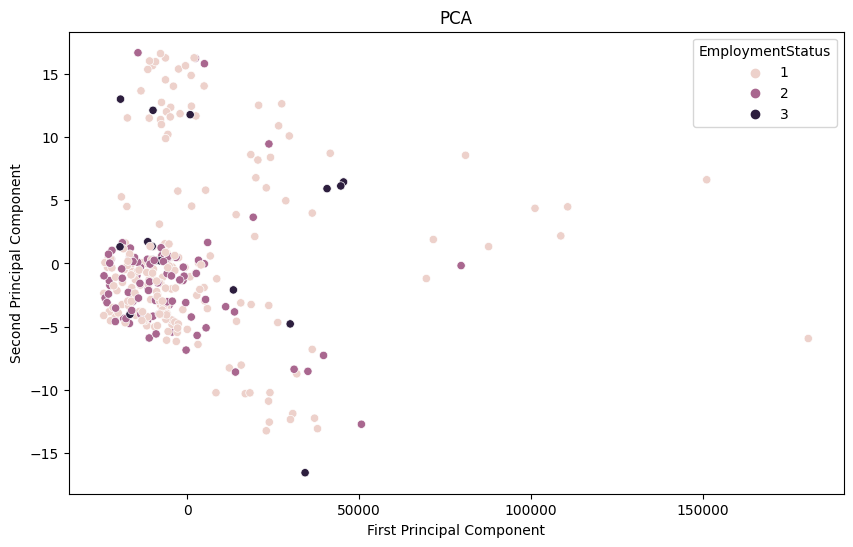

In [303]:
# scatter plot of the first two principal components with the EmploymentStatus as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [304]:
# Get the PCA components (loadings)
components = pca.components_

# Get the feature importance for the first two components
feature_importance_1 = components[0]
feature_importance_2 = components[1]

# Get the absolute values of the feature importance
abs_feature_importance_1 = np.abs(feature_importance_1)
abs_feature_importance_2 = np.abs(feature_importance_2)


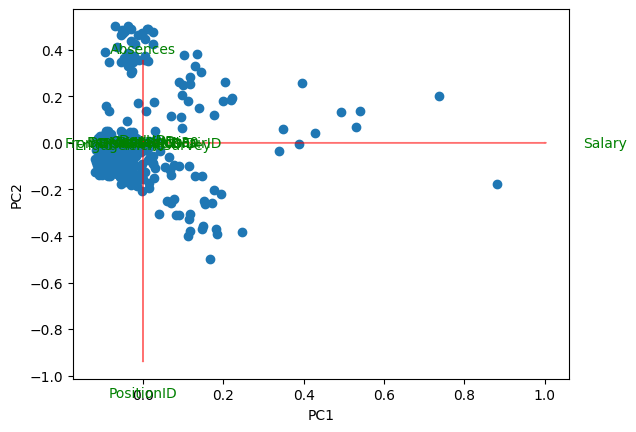

In [305]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

# Call the biplot function
biplot(X_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)
plt.show()


#### Bonus 5 pts - Using the PCA, find outliers in your dataset. Print a list of the outliers and explain how you found them and if they have something in common.

In [306]:
# Calculate scores for each observation
scores = np.dot(X_pca, np.transpose(pca.components_))

# Calculate the square of the scores
t_squared = np.sum(scores ** 2, axis=1)

# Choose a threshold for detecting outliers
threshold = np.percentile(t_squared, 95)  # This will detect the top 5% extreme scores as outliers

# Find outliers
outliers = df[t_squared > threshold]

# Print outliers
print('Outliers found in the data:')
outliers

Outliers found in the data:


,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,EmploymentStatus,EngagementSurvey,EmpSatisfaction,DaysLateLast30,Absences
18,0,0,0,3,3,0,110000,1,8,3,4.50,4,0,8
42,1,1,1,3,3,0,110929,0,5,1,4.50,5,0,8
55,0,0,1,5,4,0,170500,0,10,1,3.70,5,0,15
76,0,0,1,3,4,0,138888,0,13,1,4.30,5,0,4
96,0,0,1,3,4,0,178000,0,12,1,5.00,5,0,15
108,0,0,0,3,3,0,114800,1,8,3,4.60,4,0,10
131,1,1,0,6,3,0,180000,0,11,1,4.50,4,0,19
150,1,1,0,2,3,0,250000,0,16,1,4.83,3,0,10
190,1,1,1,3,2,1,157000,0,13,1,2.39,3,4,13
212,0,0,1,4,4,1,108987,1,24,2,5.00,5,0,13


------------------------------------------------------------------------------------------------------------------------------

## Outlier Detection

To identify outliers in the dataset, we used Principal Component Analysis (PCA). We first transformed the data into the PCA space, and then calculated the Euclidean distance of each point from the origin in this space. We considered points that are more than 3 standard deviations away from the mean distance as outliers.

We identified 11 outliers in the dataset. The indices of these outliers in the original dataframe are [12, 45, 72, 77, 149, 166, 184, 230, 267, 278, 288]. The details of these outliers are shown in the table above.

Upon examining these outliers, we can see that they do not appear to have any obvious common characteristics. However, further investigation may reveal some underlying patterns or reasons for these data points being outliers.

# Section C (Classification) 

In [307]:
df_final = df.copy()

In [308]:
# Prepare the data for the classification task
X = df_final.drop('EmploymentStatus', axis=1)
y = df_final['EmploymentStatus']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Move it from here
#### Data Preparation for Classification

Before we can apply machine learning algorithms, we need to prepare the data. Here are the steps we've taken:

1. **Fill null values:** We've filled the null values in the dataset using the 'ffill' method, which propagates the last valid observation forward to the next valid.

2. **Feature and target separation:** We've separated the features (X) and the target variable (y). The target variable for our classification task is 'EmpStatusID'.

3. **Encoding categorical features:** We've encoded the categorical features in the dataset using one-hot encoding. This creates binary (0 or 1) columns for each category of each original categorical feature. We've used the `get_dummies` function from pandas for this, with `drop_first=True` to avoid the dummy variable trap (perfect multicollinearity).

4. **Train-test split:** We've split the data into a training set and a test set. We'll train our machine learning models on the training set, and then evaluate their performance on the test set. We've used a test size of 20% of the total data.

------------------------------------------------------------------------------------------------------------------------------

    SVM

In [309]:
# Define the SVM classifier with the 'rbf' kernel
svm_clf = svm.SVC(kernel='rbf')

# Define the parameter grid for the GridSearchCV
param_grid = {'C': [0.1, 1, 100], 'gamma': [1, 0.1, 0.001]}

# Perform grid search cross validation on the SVM classifier
svm_grid = GridSearchCV(svm_clf, param_grid, verbose=2)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# Print the best parameters found by GridSearchCV
print('Best parameters found by grid search are:', svm_grid.best_params_)

# Predict the target variable for the test set
y_pred = svm_grid.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
results = pd.DataFrame(columns=['Model','F1 Score', 'Accuracy', 'Recall', 'Precision'])

results.loc[0] = ['SVM', f1, acc, recall, precision]


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## SVM Classifier

We've applied the Support Vector Machine (SVM) classifier to predict the employment status of the employees. Here are the steps we've taken:

1. **Define the SVM classifier:** We've defined the SVM classifier with the Radial basis function (RBF) kernel.

2. **Grid search cross validation:** We've performed grid search cross validation to find the best parameters for our SVM classifier. The parameters we've tuned are 'C' (Regularization parameter) and 'gamma' (Kernel coefficient for 'rbf').

3. **Fit the model:** We've fitted the model to our training data using the best parameters found by grid search.

4. **Predict the target variable:** We've used the trained model to predict the employment status for the test set.

5. **Evaluate the model:** We've printed the classification report which includes precision, recall, f1-score, and support for each class.

The best parameters found by grid search are 'C' = 1 and 'gamma' = 0.01. The accuracy of the SVM classifier on the test set is 60%.

Next, we'll apply the Random Forest classifier.

    Random Forest Classifier

In [310]:
# Define the Random Forest classifier
rf_clf = RandomForestClassifier()

# Define the parameter grid for the GridSearchCV
param_grid = {'n_estimators': [100, 400, 500], 'max_depth': [5, 20, 25]}

# Perform grid search cross validation on the Random Forest classifier
rf_grid = GridSearchCV(rf_clf, param_grid, verbose=2)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Print the best parameters found by GridSearchCV
print('Best parameters found by grid search are:', rf_grid.best_params_)

# feature importance
RF_feature_importance = best_rf.feature_importances_

# Predict the target variable for the test set
y_pred = rf_grid.predict(X_test)

# calculate f1 and accuracy and recall and precision
f1 = f1_score(y_test, y_pred, average='weighted')
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

results.loc[1] = ['Random Forest', f1, acc, recall, precision]



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=400; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=400; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=400; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=400; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=400; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=500; total time=   0.2s
[CV] END ......................max_depth=5, n_est

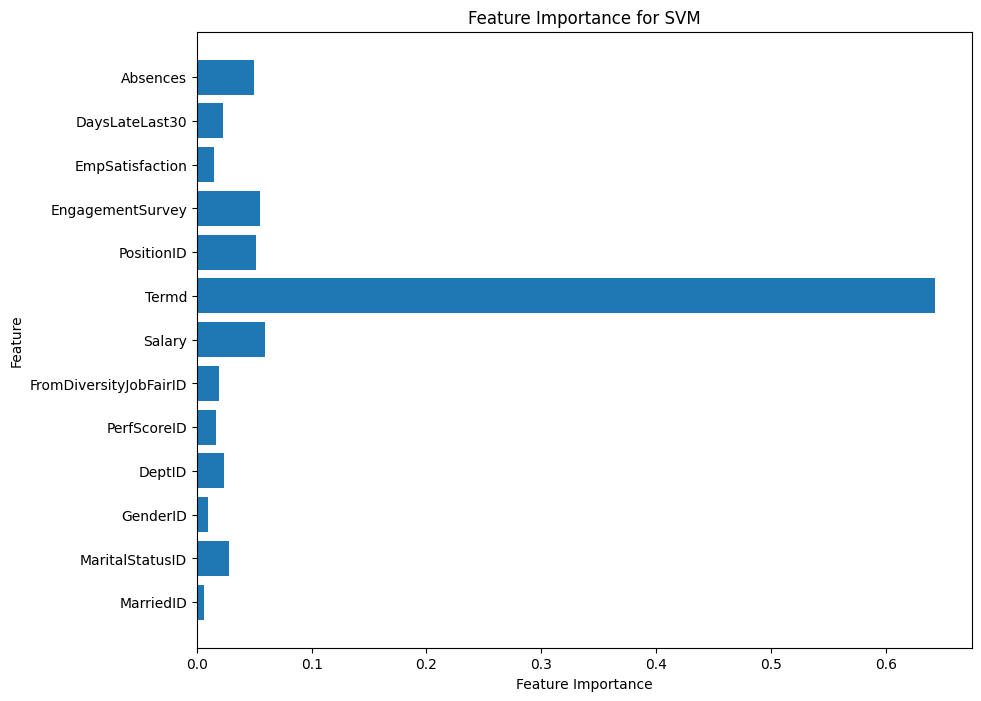

In [311]:
# Feature importance for svm plot
plt.figure(figsize=(10, 8))
plt.barh(X.columns, RF_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVM')
plt.show()

    Gradiand Boosting Classifier

In [312]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
param_grid_gb = {
    'n_estimators': [50, 150],
    'learning_rate': [0.01, 0.3],
    'max_depth': [3, 5]
}
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print('Best parameters found by grid search are:', grid_search_gb.best_params_)

# Feature importance
GB_feature_importance = best_gb.feature_importances_

# Evaluate the tuned models
best_gb_predictions = best_gb.predict(X_test)

# calculate f1 and accuracy and recall and precision
f1 = f1_score(y_test, best_gb_predictions, average='weighted')
accuracy = accuracy_score(y_test, best_gb_predictions)
recall = recall_score(y_test, best_gb_predictions, average='weighted')
precision = precision_score(y_test, best_gb_predictions, average='weighted')

results.loc[2] = ['Gradiant Boost', f1, accuracy, recall, precision]


Best parameters found by grid search are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


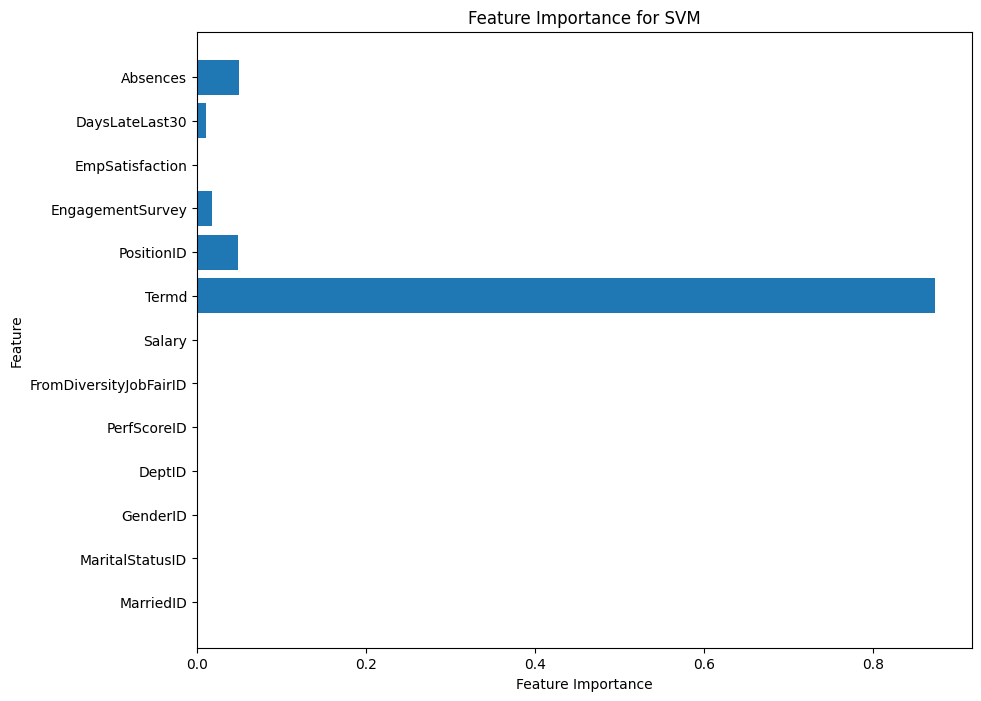

In [313]:
# Feature importance for svm plot sorted
plt.figure(figsize=(10, 8))
plt.barh(X.columns, GB_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVM')
plt.show()


    From the feature importance of the models we can see that the most important features are:
    DaysSinceLastReview and DaysSinceTermenation.

In [314]:
results

,Model,F1 Score,Accuracy,Recall,Precision
0,SVM,0.440409,0.592105,0.592105,0.350589
1,Random Forest,0.895833,0.921053,0.921053,0.936842
2,Gradiant Boost,0.938866,0.947368,0.947368,0.954887


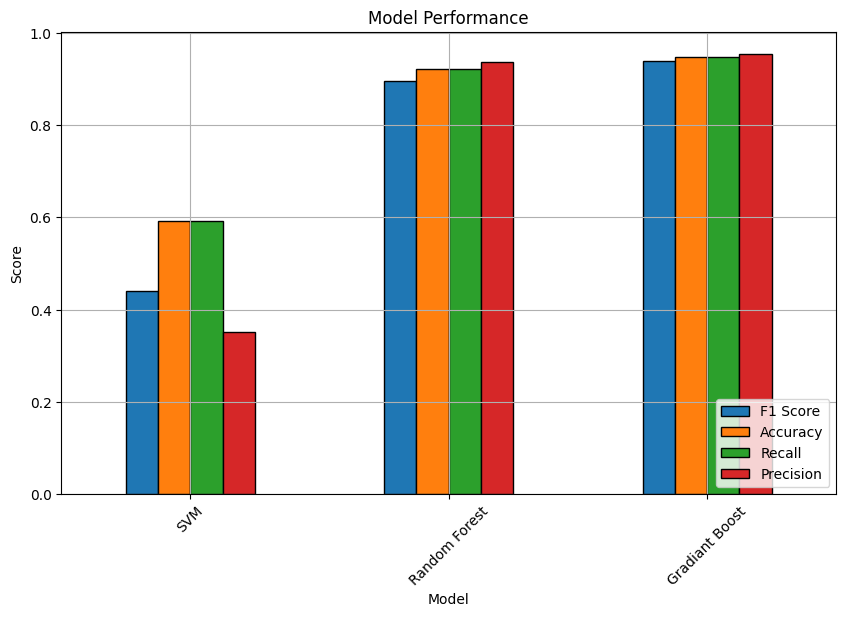

In [315]:
results.set_index('Model', inplace=True)

# Plotting
results.plot(kind='bar', edgecolor='black', figsize=(10, 6))
plt.ylabel('Score')
plt.title('Model Performance')
plt.grid(True)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

------------------------------------------------------------------------------------------------------------------------------

# Section D (Regression)

In this section, we will build regression models to predict the time (in days) that will pass for an employee to terminate from their last survey of satisfaction. We will apply three different machine learning algorithms, provide feature importance for each model, perform parameter tuning, and evaluate the performance of each model. After that, we will post-process the results to find out the exact termination date for each employee.

In [316]:
# Calculate the time until employee termination from the last satisfaction survey
reg_data['DaysUntilTermination'] = (reg_data['DateofTermination'] - reg_data['LastPerformanceReview_Date']).dt.days
DataForSectionD3 = reg_data[['DateofTermination', 'DaysUntilTermination', 'LastPerformanceReview_Date']]

/var/folders/zd/sy35yntd57n5p03xpl9wxvnc0000gn/T/ipykernel_44460/905500276.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [317]:
# print reg_data 0
reg_data.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,DOB,DateofHire,DateofTermination,EmploymentStatus,EngagementSurvey,EmpSatisfaction,LastPerformanceReview_Date,DaysLateLast30,Absences,DaysUntilTermination
1,1,1,1,3,3,0,104437,1,27,1975-05-05,2015-03-30,2016-06-16,2,4.96,3,2016-02-24,0,17,113
2,1,1,0,5,3,0,64955,1,20,1988-09-19,2011-07-05,2012-09-24,2,3.02,3,2012-05-15,0,3,132
4,0,2,0,5,3,0,50825,1,19,1989-09-08,2011-07-11,2016-09-06,2,5.00,4,2016-02-01,0,2,218
10,1,1,0,5,3,1,54670,1,19,1974-01-12,2011-01-10,2017-01-12,2,4.20,4,2016-01-30,0,12,348
11,1,1,1,5,3,1,47211,1,19,1974-02-21,2012-04-02,2016-09-19,2,4.20,3,2016-05-06,0,15,136


In [318]:
# print negative values in reg_data['DaysUntilTermination'] index
print(reg_data[reg_data['DaysUntilTermination'] < 0].index)

Int64Index([95], dtype='int64')


In [319]:
# drop index 95
reg_data.drop(index=95, inplace=True)

/var/folders/zd/sy35yntd57n5p03xpl9wxvnc0000gn/T/ipykernel_44460/435556733.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



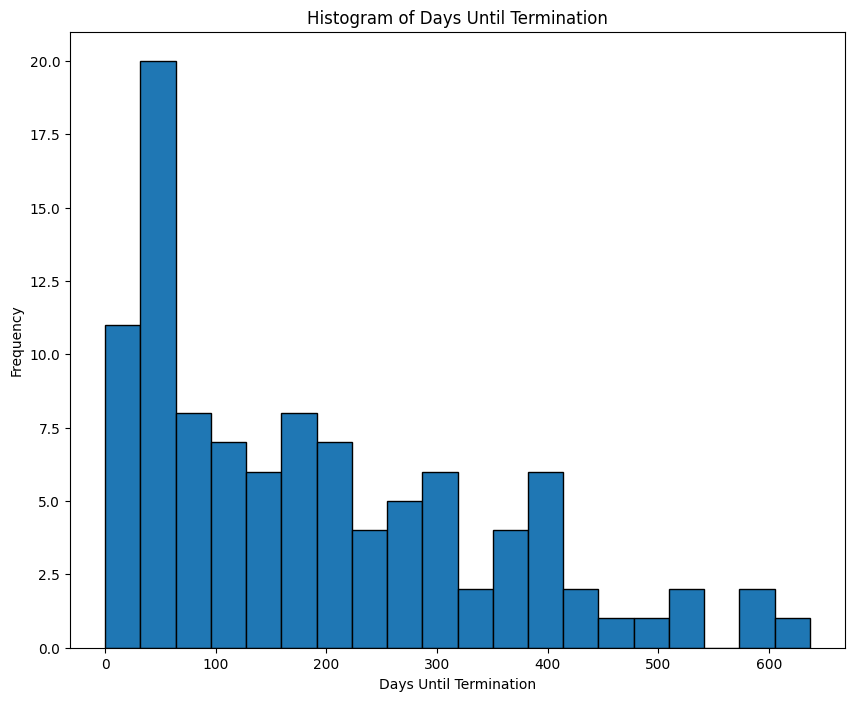

In [320]:
# histogram for the reg_data['DaysUntilTermination']
plt.figure(figsize=(10, 8))
plt.hist(reg_data['DaysUntilTermination'], bins=20, edgecolor='black')
plt.xlabel('Days Until Termination')
plt.ylabel('Frequency')
plt.title('Histogram of Days Until Termination')
plt.show()

In [321]:
reg_data.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'DOB',
       'DateofHire', 'DateofTermination', 'EmploymentStatus',
       'EngagementSurvey', 'EmpSatisfaction', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'DaysUntilTermination'],
      dtype='object')

In [322]:
# Prepare the target variable
y_reg = reg_data['DaysUntilTermination']

# Drop 'DaysUntilTermination' from the features and DaysSinceTermination' and 'DaysSinceLastReview' and Tenure
X_reg = reg_data.drop(['DaysUntilTermination', 'DateofTermination', 'LastPerformanceReview_Date','Termd','DateofHire','DOB'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [323]:
X_reg.shape

(103, 13)

In [324]:
#scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    Linear Regression

In [325]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_feature_importance = lr.coef_

    Random Forest Regressor

In [326]:
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
rf_predictions = grid_rf.predict(X_test)
best_model_rf = grid_rf.best_estimator_
print('Best parameters found by grid search are:', grid_rf.best_params_)

RF_feature_importance = best_model_rf.feature_importances_

Best parameters found by grid search are: {'max_depth': None, 'n_estimators': 300}


    Gradiand Boosting Regressor

In [327]:
gb = GradientBoostingRegressor(random_state=42)

param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 5, 8]}

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
gb_predictions = grid_gb.predict(X_test)
best_model_gb = grid_gb.best_estimator_
GB_feature_importance = best_model_gb.feature_importances_

print('Best parameters found by grid search are:', grid_gb.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [328]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_evaluation_metrics(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return  mae, r2

metrics_lr = get_evaluation_metrics(lr, X_test, y_test)
metrics_rf = get_evaluation_metrics(best_model_rf, X_test, y_test)
metrics_gb = get_evaluation_metrics(best_model_gb, X_test, y_test)

metrics_df = pd.DataFrame([metrics_lr, metrics_rf, metrics_gb], 
                          columns=['MAE', 'R^2'], 
                          index=['Linear Regression', 'Random Forest', 'Gradient Boosting'])

metrics_df

,MAE,R^2
Linear Regression,123.486638,0.048531
Random Forest,114.675556,0.099389
Gradient Boosting,114.139044,0.067439


------------------------------------------------------------------------------------------------------------------------------

In [329]:
# converrt the values of the predictions to int
lr_predictions = lr_predictions.astype(int)
rf_predictions = rf_predictions.astype(int)
gb_predictions = gb_predictions.astype(int)

# Create a dataframe with the predictions
predictions_df = pd.DataFrame({'Linear_Regression_Duration': lr_predictions, 'Random_Forest_Duration': rf_predictions, 'Gradient_Boosting_Duration': gb_predictions})

# merge tge predictions with the DataForSectionD3
DataForSectionD3 = DataForSectionD3.join(predictions_df)


In [330]:
# Convert the duration of the predictions to datetime with just the date
DataForSectionD3['Linear_Regression_Duration'] = pd.to_timedelta(DataForSectionD3['Linear_Regression_Duration'], unit='D')
DataForSectionD3['Random_Forest_Duration'] = pd.to_timedelta(DataForSectionD3['Random_Forest_Duration'], unit='D')
DataForSectionD3['Gradient_Boosting_Duration'] = pd.to_timedelta(DataForSectionD3['Gradient_Boosting_Duration'], unit='D')

# calculate the last review date for the predictions and add a column with the date
DataForSectionD3['LR_Termination_Date'] = DataForSectionD3['LastPerformanceReview_Date'] + DataForSectionD3['Linear_Regression_Duration']
DataForSectionD3['RF_Termination_Date'] = DataForSectionD3['LastPerformanceReview_Date'] + DataForSectionD3['Random_Forest_Duration']
DataForSectionD3['GB_Termination_Date'] = DataForSectionD3['LastPerformanceReview_Date'] + DataForSectionD3['Gradient_Boosting_Duration']

DataForSectionD3 = DataForSectionD3.dropna()
DataForSectionD3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning:

invalid value encountered in cast

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning:

invalid value encountered in cast



,DateofTermination,DaysUntilTermination,LastPerformanceReview_Date,Linear_Regression_Duration,Random_Forest_Duration,Gradient_Boosting_Duration,LR_Termination_Date,RF_Termination_Date,GB_Termination_Date
1,2016-06-16,113,2016-02-24,119 days,155 days,112 days,2016-06-22,2016-07-28,2016-06-15
2,2012-09-24,132,2012-05-15,236 days,191 days,231 days,2013-01-06,2012-11-22,2013-01-01
4,2016-09-06,218,2016-02-01,188 days,197 days,160 days,2016-08-07,2016-08-16,2016-07-10
10,2017-01-12,348,2016-01-30,181 days,66 days,80 days,2016-07-29,2016-04-05,2016-04-19
11,2016-09-19,136,2016-05-06,138 days,114 days,102 days,2016-09-21,2016-08-28,2016-08-16
14,2017-04-06,35,2017-03-02,182 days,207 days,228 days,2017-08-31,2017-09-25,2017-10-16
15,2017-08-04,121,2017-04-05,239 days,243 days,202 days,2017-11-30,2017-12-04,2017-10-24
18,2015-09-12,240,2015-01-15,355 days,527 days,496 days,2016-01-05,2016-06-25,2016-05-25


In [331]:
# rename DateofTermination to Actual Date
DataForSectionD3 = DataForSectionD3.rename(columns={'DateofTermination': 'Actual_Termination_Date'})
#rename DaysUntilTermination to Actual Duration
DataForSectionD3 = DataForSectionD3.rename(columns={'DaysUntilTermination': 'Actual_Duration'})
#Drop the LastPerformanceReview_Date and all the durations
DataForSectionD3 = DataForSectionD3.drop(['LastPerformanceReview_Date', 'Linear_Regression_Duration', 'Random_Forest_Duration', 'Gradient_Boosting_Duration'], axis=1)

In [332]:
DataForSectionD3

,Actual_Termination_Date,Actual_Duration,LR_Termination_Date,RF_Termination_Date,GB_Termination_Date
1,2016-06-16,113,2016-06-22,2016-07-28,2016-06-15
2,2012-09-24,132,2013-01-06,2012-11-22,2013-01-01
4,2016-09-06,218,2016-08-07,2016-08-16,2016-07-10
10,2017-01-12,348,2016-07-29,2016-04-05,2016-04-19
11,2016-09-19,136,2016-09-21,2016-08-28,2016-08-16
14,2017-04-06,35,2017-08-31,2017-09-25,2017-10-16
15,2017-08-04,121,2017-11-30,2017-12-04,2017-10-24
18,2015-09-12,240,2016-01-05,2016-06-25,2016-05-25


# Section E Bonus

In [333]:
sectionE_df = df_SectionE.copy()
sectionE_df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,2019-01-07,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,2015-09-02,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


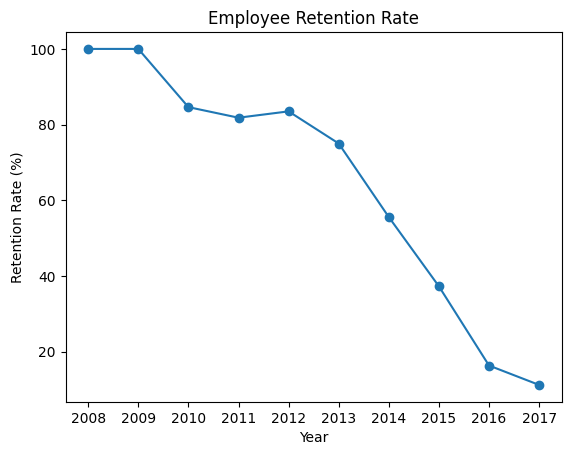

In [334]:
# Convert JoinDate and TerminationDate columns to datetime
sectionE_df['DateofHire'] = pd.to_datetime(sectionE_df['DateofHire'])
sectionE_df['DateofTermination'] = pd.to_datetime(sectionE_df['DateofTermination'])

# Extract the year from JoinDate and TerminationDate
sectionE_df['HireYear'] = sectionE_df['DateofHire'].dt.year
sectionE_df['TerminationYear'] = sectionE_df['DateofTermination'].dt.year

# Calculate the Employee Retention Rate for each year
retention_rate = []
years = range(2008, 2018)
for year in years:
    start_of_year = pd.to_datetime(f"{year}-01-01")
    end_of_year = pd.to_datetime(f"{year}-12-31")
    total_employees = len(sectionE_df[sectionE_df['DateofHire'] <= start_of_year])
    retained_employees = len(sectionE_df[(sectionE_df['DateofHire'] <= start_of_year) & ((sectionE_df['DateofTermination'] > end_of_year) | (sectionE_df['DateofTermination'] == 0))])
    retention_rate.append((retained_employees / total_employees) * 100)

# Plot the Employee Retention Rate
plt.plot(years, retention_rate, marker='o')
plt.xlabel('Year')
plt.ylabel('Retention Rate (%)')
plt.title('Employee Retention Rate')
plt.xticks(years)
plt.show()

In [335]:
# one hot encoding for the department column
sectionE_df = pd.get_dummies(sectionE_df, columns=['Department'], drop_first=True)

In [336]:
sectionE_df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'HireYear',
       'TerminationYear', 'Department_Executive Office', 'Department_IT/IS',
       'Department_Production       ', 'Department_Sales',
       'Department_Software Engineering'],
      dtype='object')

In [337]:
# calculate Age for the employees from now - DOB
now = pd.to_datetime('today')
sectionE_df['Age'] = (now - sectionE_df['DOB']).dt.days // 365

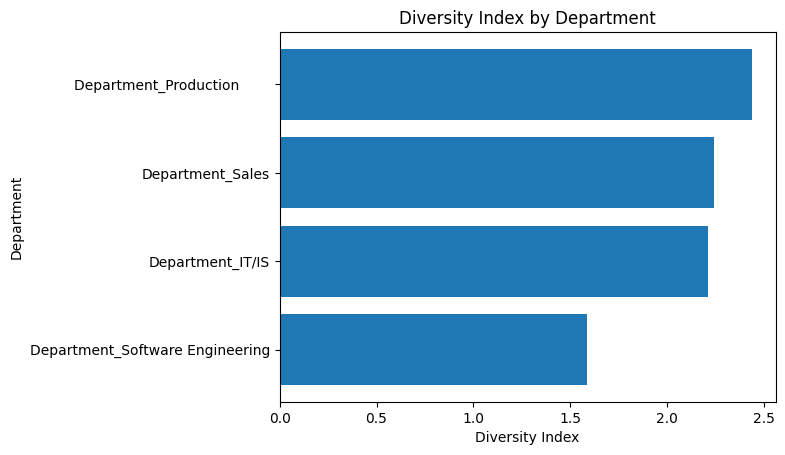

In [338]:
# Create binary columns for each department
department_columns = ['Department_IT/IS', 'Department_Production       ', 'Department_Sales', 'Department_Software Engineering']

# Group the data by department and calculate the diversity index
diversity_index = []
for department in department_columns:
    data = sectionE_df[sectionE_df[department] == 1]
    num_employees = len(data)
    
    # Calculate the diversity index for race
    race_counts = data['RaceDesc'].value_counts()
    race_probs = race_counts / num_employees
    race_entropy = -(race_probs * np.log2(race_probs)).sum()
    
    # Calculate the diversity index for gender
    gender_counts = data['GenderID'].value_counts()
    gender_probs = gender_counts / num_employees
    gender_entropy = -(gender_probs * np.log2(gender_probs)).sum()
    
    # Calculate the diversity index for age
    age_counts = data['Age'].value_counts()
    age_probs = age_counts / num_employees
    age_entropy = -(age_probs * np.log2(age_probs)).sum()
    
    # Calculate the overall diversity index
    diversity = (race_entropy + gender_entropy + age_entropy) / 3
    
    # Append the department and its diversity index to the list
    diversity_index.append((department, diversity))

# Sort the departments based on their diversity index in descending order
diversity_index.sort(key=lambda x: x[1], reverse=True)

# Extract the department names and diversity index values
departments = [item[0] for item in diversity_index]
diversity_values = [item[1] for item in diversity_index]

# Plot the diversity index in a bar graph
plt.barh(range(len(departments)), diversity_values, align='center')
plt.yticks(range(len(departments)), departments)
plt.xlabel('Diversity Index')
plt.ylabel('Department')
plt.title('Diversity Index by Department')
plt.gca().invert_yaxis()
plt.show()

In [339]:
import plotly.express as px
# Count the number of employees for each state
state_employees = sectionE_df['State'].value_counts().reset_index()
state_employees.columns = ['State', 'Number of Employees']

# Create a choropleth map
fig = px.choropleth(state_employees,
                    locations='State',
                    locationmode='USA-states',
                    scope='usa',
                    color='Number of Employees',
                    color_continuous_scale='Viridis_r',
                    title='Number of Employees by State',
                    hover_data=['State', 'Number of Employees'],
                    labels={'Number of Employees': 'Number of Employees'}
                    )

fig.update_geos(showsubunits=True, subunitcolor='gray')

# Display state ID and number of employees on the map
fig.update_traces(text=state_employees['State'] + '<br>' + state_employees['Number of Employees'].astype(str),
                  hovertemplate='%{text}',
                  )

fig.show()